## Fan Charts - IDB

#### Importing Libraries

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly

In [19]:
#Explicación de insumos:

#1. Omega: Matriz de seis por seis. Formato: numpy.ndarray
           #Esto corresponde a la matriz de Var-Covar de la página
           #Favor ingresarlos con los nombres en el documento de word
           # y en el mismo orden. Ver word adjunto: 
            #[rtml,rtme, et,gildt,gidet,ggpt]. 
            
        #1. Tasa de interés nominal de la deuda en moneda local [rtml]
        #2. Tasa de interés nominal de la deuda en moneda extranjera [rtme]
        #3. Tasa de cambio [et]
        #4. Tasa de crecimiento de los ingresos de libre destinación [gildt]
        #5. Tasa de crecimiento de los ingresos con destinación específica [gidet]
        #6. Tasa de crecmiento nominal del gasto primario [ggpt]

#2. mu_0. Vector de seis dimensiones. Se le debe preguntar al usuario
        #en cada una de las seis variables el intercepto. 
        #en la actualidad no se pregunta en la página. Preguntar como
        #Niveles de intercepto del var. Nombres y orden de variables
        #comentario anterior aplica. Formato: numpy.ndarray

#3. mu_1. Matriz de seis por seis. Formato: numpy.ndarray. 
          #Este valor corresponde a la matriz de "Coeficientes del VAR"
          #Comentario de orden y nombres de #1. Omega aplica. 

#4. T. Número de periodos que se va a realizar la predicción. Formato en
        #python es: 'int'. 
    
#5. InitialConditions. Son las condiciones iniciales de las seis variables en el 
        #periodo a partir del cual se hacen las predicciones. Es un vector de 6x1
        #y de formato numpy.ndarray. El orden de las condiciones iniciales es:
        #1. Tasa de interés nominal de la deuda en moneda local [rtml]
        #2. Tasa de interés nominal de la deuda en moneda extranjera [rtme]
        #3. Tasa de cambio [et]
        #4. Tasa de crecimiento de los ingresos de libre destinación [gildt]
        #5. Tasa de crecimiento de los ingresos con destinación específica [gidet]
        #6. Tasa de crecmiento nominal del gasto primario [ggpt]
        
        
#6. ILD0: Nivel de ingresos de libre destinación antes de predicción
         #Último dato antes de hacer predicciones. Formato: 'float'
    
#7. IDE0: Ingresos de Destinación específica últimos antes de hacer predicción. 
        #Formato: 'float'

#8. GP0: Gasto primario antes de hacer predicción. Formato: 'float'. 

#9. e0_level: Nivel inicial de tasa de cambio. Formato: 'float' 

#10. alpha: Porcentaje del a deuda
           #en moneda local. Seleccionado por el usuario. Formato: 'float'. 

#11. X: Umbral definido por el usuario en formato 'float'


#12. D0: Nivel inicial de la deuda. 
    
#Output:

#1. l5. Serie eje "x" del gráfico de fan charts. Formato numpy.ndarray
#2. ffit. Línea eje "y" del fan chart. numpy.ndarray
#3. y5. Serie eje "y" para hacer scatter en fan charts. numpy.ndarray
#4. PROBA: Probabilidad de que la deuda exceda el umbral. Formato 'numpy.float64'

def FanChartVAR(Omega,mu_0,mu_1,T,InitialConditions,alpha,e0_level):
    
    #Means of shocks is around zero
    means=np.zeros(6)
    
    #Need to set seed to obtain same shocks every time
    np.random.seed(2581633)
    
    #Generate vector of (6)X10,000*T
    Y = np.random.multivariate_normal(means, Omega, 10000*T).T
    
    #Turn into 3d array
    Y2=Y.reshape((6,10000,T))
    
    #Generate the vector of predictions
    Predictions=np.zeros((6,10000,T))
    
    #Generate the initial predictions
    Predictions[:,:,0]=mu_0+np.matmul(mu_1,InitialConditions)+Y2[:,:,0].reshape((6,10000))
    
    #Looping over time to obtain the remaining predictions
    for t in range(1, T):
        Predictions[:,:,t]=mu_0+np.matmul(mu_1,Predictions[:,:,t-1])+Y2[:,:,t].reshape((6,10000))
    
    return(Predictions)

In [20]:
YTOTAL=FanChartVAR(OMT,mu_0,mu_1,T,InitialConditionsTest)

#Load the corresponding output of YTotal into the necessary variables. 

rml=YTOTAL[0,:,:]
rme=YTOTAL[1,:,:]
et=YTOTAL[2,:,:]
gild=YTOTAL[3,:,:]
gnild=YTOTAL[4,:,:]
ggp=YTOTAL[5,:,:]


In [21]:
#Obtaining the depreciation rate


def Depreciation(et,e0_level,T):
    
    #The e0 is given by the initial condition. 
    #et is the prediction of the exchange rates generated in the function FanChartVAR
    DepReturn=np.zeros((10000,T))
    
    #Depreciation between period 0 and 1:
    DepReturn[:,0]=(et[:,0]-e0_level)/e0_level
    for t in range(1, T):
        DepReturn[:,t]=(et[:,t]-et[:,t-1])/et[:,t-1]
    return(DepReturn)

In [23]:
#Function predicting ILD:
def ILDT(gild,T,ILD0):

    #Obtaining ILD: Assuming initial condition for ILD0
    
    ILD=np.zeros((10000,T))

    #Broadcasting initial condition
    ILD[:,0]=ILD0
    
    #Predicting
    for t in range(1,T):
        ILD[:,t]=(1+gild[:,t-1])*ILD[:,t-1]

    return(ILD)


In [24]:
#Testing ILDT and IDE
ILD=ILDT(gild,T,ILD0)
IDE=ILDT(gnild,T_test,IDE0)
GP=ILDT(ggp,T_test,GP0)

Dep=Depreciation(et,InitialConditions[2,0],T)


(10000, 5)


In [25]:
#Function predicting FT:
def FTPRED(ILD,IDE,GP):
    return(ILD+IDE-GP)

In [26]:
FT=FTPRED(ILD,IDE,GP)

(10000, 5)


In [27]:

print(Dep.shape)
#Predicting DT
DT=np.zeros((10000,T))
DT[:,0]=D0
for t in range(1,T):
    DT[:,t]=(alpha*(1+rml[:,t])+(1-alpha)*(1+rme[:,t])*(1+Dep[:,t-1]))*DT[:,t-1]-FT[:,t]
#def DTPREDICTION(alpha,rml,rme,deval,D0,FT):
    

(10000, 5)


## Finalmente. Deuda como proporción de ILD

In [29]:
FC=DT/ILD

In [30]:
l1=np.zeros(10000)+1
for d in range(2,T+1):
    print(d)
    l1=np.append(l1,np.zeros(10000)+d)


In [2]:
y1=FC[:,0]
for d in range(1,T):
    print(d)
    y1=np.append(y1,FC[:,d])

NameError: name 'FC' is not defined

### Fan Chart

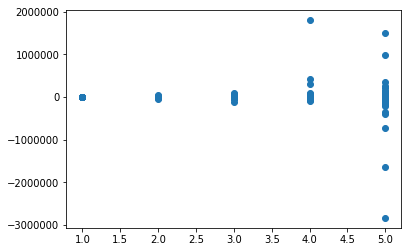

In [32]:
coefs = poly.polyfit(l1, y1, 4)
ffit = poly.polyval(l1, coefs)


In [1]:
PROBA=sum(FC[:,4]>X)/10000

NameError: name 'y5' is not defined